<a href="https://colab.research.google.com/github/QuinnWass/CPSC-4310-01/blob/master/DAP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAP6

In [0]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm, tqdm_gui, tqdm_notebook
import tensorflow as tf
from tensorflow import keras

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)


from scipy import stats

import pandas as pd
import re
import nltk
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm, tqdm_gui, tqdm_notebook
from sklearn.naive_bayes import GaussianNB


%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)


from scipy import stats

In [0]:
parts_of_speech = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ',
                    'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP',
                    'NNPS', 'PDT', 'PRP$', 'RB', 'RBR', 'PRP', 'RBS',
                    'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP',
                    'VBZ', 'WDT', 'WP', 'WP$', 'WRB' ]

#Load dataset into df
dataset = 'https://raw.githubusercontent.com/QuinnWass/CPSC-4310-01/master/FakeNewsClassifier/processeddata/cb_full_parsed.csv'
df = pd.read_csv(dataset)


#this is to get rid  https://seattleu.zoom.us/j/5664223549 of the XX.1 thing we have going on for some reason when
#the dataframe is loaded.
df = df.drop(columns = parts_of_speech)
parts_of_speech_dict = {'CC.1':'CC', 'CD.1':'CD', 'DT.1':'DT', 'EX.1':'EX', 'FW.1':'FW', 'IN.1':'IN', 'JJ.1':'JJ', 'JJR.1':'JJR', 'JJS.1':'JJS', 'LS.1':'LS', 'MD.1':'MD',
                   'NN.1':'NN', 'NNS.1':'NNS', 'NNP.1':'NNP', \
                    'NNPS.1':'NNPS', 'PDT.1':'PDT', 'PRP$.1':'PRP$', 'RB.1':'RB', 'RBR.1':'RBR', 'PRP.1':'PRP', 'RBS.1':'RBS', \
                    'RP.1':'RP', 'TO.1':'TO', 'UH.1':'UH', 'VB.1':'VB', 'VBD.1':'VBD', 'VBG.1':'VBG', 'VBN.1':'VBN', 'VBP.1':'VBP', \
                    'VBZ.1':'VBZ', 'WDT.1':'WDT', 'WP.1':'WP', 'WP$.1':'WP$', 'WRB.1':'WRB' }
                    
df = df.rename(columns=parts_of_speech_dict)



df.classification = pd.Categorical(df.classification)
df['code'] = df.classification.cat.codes

#appending additional features to the parts of speech array
#as our exploratory analysis has shown they may be a factor
features = parts_of_speech + ['word_count', 'title_sentiment', 'sentiment']
X_df = df[features]
Y_df = df['code']

X = X_df.values
y = Y_df.values

In [0]:
from sklearn.model_selection import train_test_split

X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)


In [0]:
# Import `StandardScaler` from `sklearn.preprocessing`
# We found that scaling decreased our accuracy
#from sklearn.preprocessing import StandardScaler

# Define the scaler 
#scaler = StandardScaler().fit(X_train)

# Scale the train set
#X_train_scaled = scaler.transform(X_train)

# Scale the test set
#X_test_scaled = scaler.transform(X_test)

## Neural Network

In [0]:
#Reducing number of Epochs

# construct a model
modelK = keras.models.Sequential([
    keras.layers.Dense(2*len(X_df.columns), activation='swish', input_shape=(len(X_df.columns),)),
    keras.layers.Dense(100, activation = 'swish'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(100,activation='swish'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(40, activation = 'swish'),
    keras.layers.Dense(len(X_df.columns), activation = 'sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')
])

modelK.compile(loss='BinaryCrossentropy', optimizer='nadam', metrics=['accuracy', tf.keras.metrics.AUC()])

modelK.fit(X_train_NN, y_train_NN, epochs=50, batch_size=242, validation_steps=4, validation_split=0.12, 
           validation_batch_size=100, verbose=1)

print('Evaluate')
modelK.evaluate(X_test_NN, y_test_NN, verbose=1)

Epoch 1/50
129/129 [==============================] - 1s 11ms/step - loss: 0.6820 - accuracy: 0.5672 - auc_1: 0.5839 - val_loss: 0.6340 - val_accuracy: 0.6225 - val_auc_1: 0.6714
Epoch 2/50
129/129 [==============================] - 1s 8ms/step - loss: 0.6523 - accuracy: 0.5992 - auc_1: 0.6376 - val_loss: 0.6183 - val_accuracy: 0.6500 - val_auc_1: 0.7165
Epoch 3/50
129/129 [==============================] - 1s 9ms/step - loss: 0.5645 - accuracy: 0.7064 - auc_1: 0.7795 - val_loss: 0.3736 - val_accuracy: 0.8450 - val_auc_1: 0.9226
Epoch 4/50
129/129 [==============================] - 1s 9ms/step - loss: 0.4070 - accuracy: 0.8269 - auc_1: 0.8921 - val_loss: 0.3428 - val_accuracy: 0.8425 - val_auc_1: 0.9363
Epoch 5/50
129/129 [==============================] - 1s 9ms/step - loss: 0.3715 - accuracy: 0.8439 - auc_1: 0.9129 - val_loss: 0.3248 - val_accuracy: 0.8875 - val_auc_1: 0.9366
Epoch 6/50
129/129 [==============================] - 1s 9ms/step - loss: 0.3557 - accuracy: 0.8523 - auc_1: 

[0.3066292703151703, 0.8727129101753235, 0.9428352117538452]

## Decision Tree, Knn, Guassian Naive Bayes 

In [0]:
#Load dataset into df
dataset = 'https://raw.githubusercontent.com/QuinnWass/CPSC-4310-01/master/FakeNewsClassifier/processeddata/cb_full_parsed.csv'
df = pd.read_csv(dataset)


#this is to get rid  https://seattleu.zoom.us/j/5664223549 of the XX.1 thing we have going on for some reason when
#the dataframe is loaded.
df = df.drop(columns = parts_of_speech)
parts_of_speech_dict = {'CC.1':'CC', 'CD.1':'CD', 'DT.1':'DT', 'EX.1':'EX', 'FW.1':'FW', 'IN.1':'IN', 'JJ.1':'JJ', 'JJR.1':'JJR', 'JJS.1':'JJS', 'LS.1':'LS', 'MD.1':'MD',
                   'NN.1':'NN', 'NNS.1':'NNS', 'NNP.1':'NNP', \
                    'NNPS.1':'NNPS', 'PDT.1':'PDT', 'PRP$.1':'PRP$', 'RB.1':'RB', 'RBR.1':'RBR', 'PRP.1':'PRP', 'RBS.1':'RBS', \
                    'RP.1':'RP', 'TO.1':'TO', 'UH.1':'UH', 'VB.1':'VB', 'VBD.1':'VBD', 'VBG.1':'VBG', 'VBN.1':'VBN', 'VBP.1':'VBP', \
                    'VBZ.1':'VBZ', 'WDT.1':'WDT', 'WP.1':'WP', 'WP$.1':'WP$', 'WRB.1':'WRB' }
df = df.rename(columns=parts_of_speech_dict)

In [0]:
#appending additional features to the parts of speech array
#as our exploratory analysis has shown they may be a factor
features = parts_of_speech + ['word_count', 'title_sentiment', 'sentiment']
X_df = df[features]
Y_df = df['classification']
X = X_df.values
y = Y_df.values

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)


In [0]:
rand_state = 42
entropy_tree = DecisionTreeClassifier(max_depth = 15, criterion = "entropy", random_state = rand_state)
gini_tree = DecisionTreeClassifier(max_depth = 15, criterion = "gini", random_state = rand_state)
knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto')
gnb = GaussianNB()

kf = KFold(n_splits=26, random_state=rand_state, shuffle=True)

for train_index, test_index in kf.split(X_train):
  kf_X_train, kf_X_test = X[train_index], X[test_index]
  kf_y_train, kf_y_test = y[train_index], y[test_index]

  entropy_tree.fit(kf_X_train, kf_y_train)
  gini_tree.fit(kf_X_train, kf_y_train)
  knn.fit(kf_X_train, kf_y_train)
  gnb.fit(kf_X_train, kf_y_train)


In [0]:
from sklearn.metrics import accuracy_score

entropy_y_pred = entropy_tree.predict(X_test)
gini_y_pred = gini_tree.predict(X_test)
knn_y_pred = knn.predict(X_test)
gnb_y_pred = gnb.predict(X_test)

print("Entropy accuracy: ", accuracy_score(y_test, entropy_y_pred))
print("Gini accuracy: ", accuracy_score(y_test, gini_y_pred))
print("Knn accuracy: ", accuracy_score(y_test, knn_y_pred))
print("Neural Network accuracy", modelK.evaluate(X_test_NN, y_test_NN, verbose=1))
print("GNB accuracy: ", accuracy_score(y_test, gnb_y_pred))

Entropy accuracy:  0.905692342444093
Gini accuracy:  0.913937203523831
Knn accuracy:  0.9457872148181613
277/277 [==============================] - 1s 2ms/step - loss: 0.3066 - accuracy: 0.8727 - auc_1: 0.9428
Neural Network accuracy [0.3066292703151703, 0.8727129101753235, 0.9428352117538452]
GNB accuracy:  0.5965665236051502


In [0]:
# Show confusion matrix  --This code has been borrowed from an example given
#by Dr. Wan Bae, Seattle University
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
  
y_pred_entropy = entropy_tree.predict(X_test)
y_pred_gini = gini_tree.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_gnb = gnb.predict(X_test)

entropy_result = classification_report(y_test, y_pred_entropy, target_names=['real', 'fake'])
gini_result = classification_report(   y_test, y_pred_gini,    target_names=['real', 'fake'])
knn_result = classification_report(    y_test, y_pred_knn,     target_names=['real', 'fake'])
gnb_result = classification_report(    y_test, y_pred_gnb,     target_names=['real', 'fake'])

print("Entropy Decision Tree\n", entropy_result)
print("Gini Decision Tree\n",gini_result)
print("K Nearest Neighbors\n", knn_result)
print("Gaussian Naive Bayes\n", gnb_result)

y_predict_prob_knn = knn.predict_proba(X_test)
y_predict_prob_entropy = entropy_tree.predict_proba(X_test)
y_predict_prob_gini = gini_tree.predict_proba(X_test)
y_predict_prob_gnb = gnb.predict_proba(X_test)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_predict_prob_knn[:, 1], pos_label='real')
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_entropy, tpr_entropy, thresholds_entropy = roc_curve(y_test, y_predict_prob_entropy[:,1], pos_label='real')
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

fpr_gini, tpr_gini, thresholds_gini = roc_curve(y_test, y_predict_prob_gini[:,1], pos_label='real')
roc_auc_gini = auc(fpr_gini, tpr_gini)

fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_predict_prob_gnb[:,1], pos_label='real')
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

Entropy Decision Tree
               precision    recall  f1-score   support

        real       0.87      0.96      0.91      4585
        fake       0.95      0.85      0.90      4269

    accuracy                           0.91      8854
   macro avg       0.91      0.90      0.91      8854
weighted avg       0.91      0.91      0.91      8854

Gini Decision Tree
               precision    recall  f1-score   support

        real       0.88      0.96      0.92      4585
        fake       0.95      0.87      0.91      4269

    accuracy                           0.91      8854
   macro avg       0.92      0.91      0.91      8854
weighted avg       0.92      0.91      0.91      8854

K Nearest Neighbors
               precision    recall  f1-score   support

        real       0.91      1.00      0.95      4585
        fake       1.00      0.89      0.94      4269

    accuracy                           0.95      8854
   macro avg       0.95      0.94      0.95      8854
weighted a

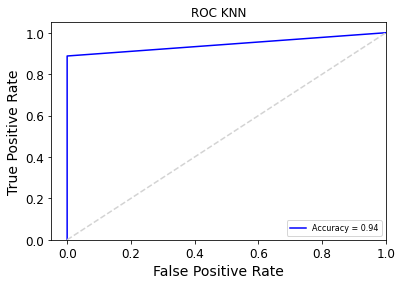

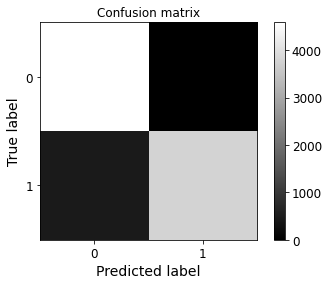

In [0]:
plt.title('ROC KNN')
plt.plot(fpr_knn, tpr_knn, 'b', label=('Accuracy = %0.2f'%roc_auc_knn))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(knn_confusion_matrix, 2)

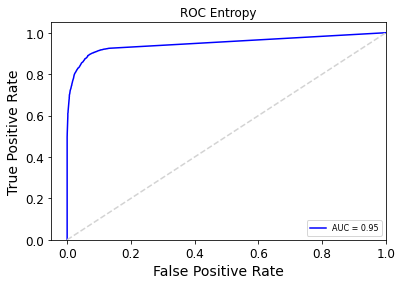

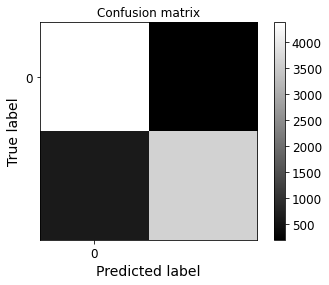

In [0]:
plt.title('ROC Entropy')
plt.plot(fpr_entropy, tpr_entropy, 'b', label = 'AUC = %0.2f' % roc_auc_entropy)
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
entropy_confusion_matrix = confusion_matrix(y_test, y_pred_entropy)
plot_confusion_matrix(entropy_confusion_matrix, 1)

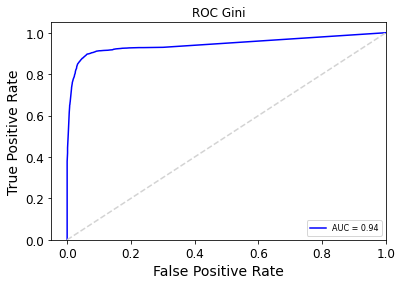

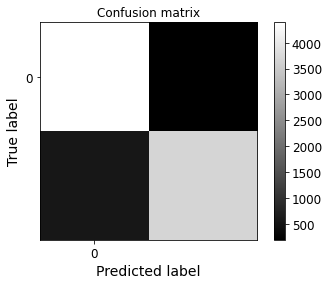

In [0]:
plt.title('ROC Gini')
plt.plot(fpr_gini, tpr_gini, 'b', label = 'AUC = %0.2f' % roc_auc_gini)
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
gini_confusion_matrix = confusion_matrix(y_test, y_pred_gini)
plot_confusion_matrix(gini_confusion_matrix, 1)

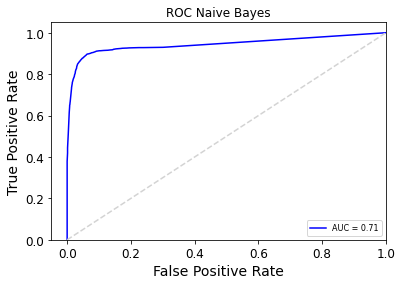

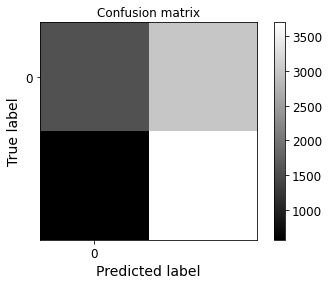

In [0]:
plt.title('ROC Naive Bayes')
plt.plot(fpr_gini, tpr_gini, 'b', label = 'AUC = %0.2f' % roc_auc_gnb)
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
plot_confusion_matrix(gnb_confusion_matrix, 1)

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


title = r"Learning Curve (Entropy Tree)"
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimator = DecisionTreeClassifier(max_depth = 15, criterion = "entropy", random_state = rand_state)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 6) )

title = r"Learning Curve (Entropy Tree)"
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimator = DecisionTreeClassifier(max_depth = 15, criterion = "gini", random_state = rand_state)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curve (KNN)"
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimator = knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 3], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)



In [0]:
entropy_tree = DecisionTreeClassifier(max_depth = 15, criterion = "entropy", random_state = rand_state)
gini_tree = DecisionTreeClassifier(max_depth = 15, criterion = "gini", random_state = rand_state)
knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto')
gnb = GaussianNB()

#Learning Curves


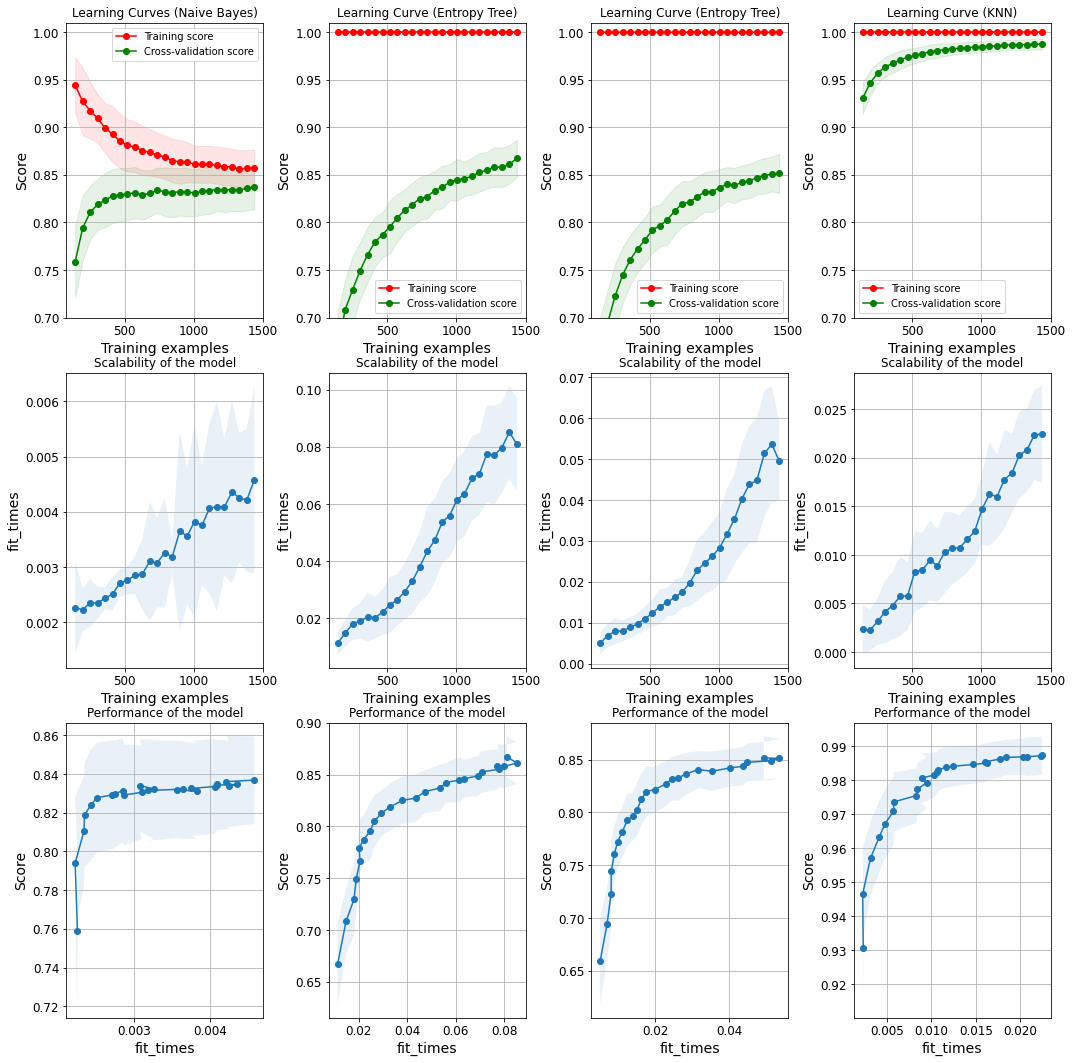

In [71]:
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
fig.tight_layout(pad=3.0)

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4,  train_sizes=np.linspace(0.1, 1.0, 25))

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
title = r"Learning Curve (Entropy Tree)"
estimator = DecisionTreeClassifier(max_depth = 15, criterion = "entropy", random_state = rand_state)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 25) )

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
title = r"Learning Curve (Entropy Tree)"
estimator = DecisionTreeClassifier(max_depth = 15, criterion = "gini", random_state = rand_state)
plot_learning_curve(estimator, title,  X, y, axes=axes[:, 2], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 25))

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
title = r"Learning Curve (KNN)"
estimator = knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto')
plot_learning_curve(estimator, title,  X, y, axes=axes[:, 3], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 25))

plt.show()